In [1]:
import numpy as np
import pandas as pd
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
t_train = pd.read_csv(r'G:\Study Material\Data Science\KAGGLE Competitions\train.csv')
t_test = pd.read_csv(r'G:\Study Material\Data Science\KAGGLE Competitions\test.csv')
Titanice = [t_train, t_test]

In [3]:
import pandas_profiling

In [4]:
pandas_profiling.ProfileReport(t_train)

In [5]:
t_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
t_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
t_train.info()
print('-'*50)
t_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         41

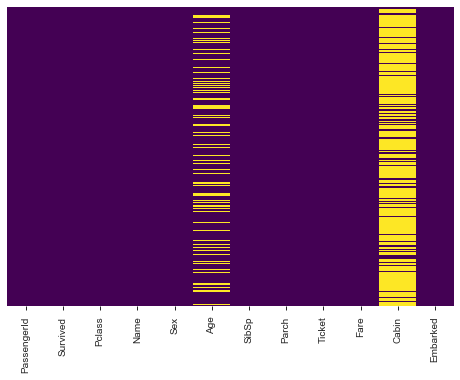

In [8]:
sns.heatmap(t_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

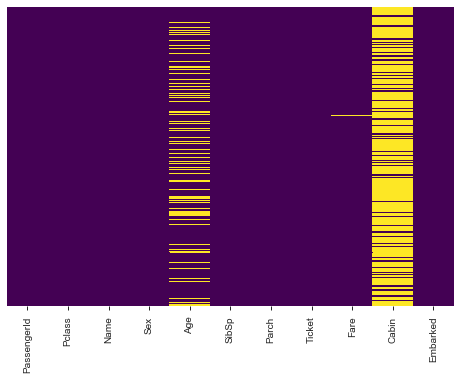

In [9]:
sns.heatmap(t_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
a=t_train[t_train['Pclass']==1]['Age'].median()

b=t_train[t_train['Pclass']==2]['Age'].median()

c=t_train[t_train['Pclass']==3]['Age'].median()

print (a,b,c)

37.0 29.0 24.0


In [11]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [12]:
t_train['Age'] = t_train[['Age','Pclass']].apply(fill_age,axis=1)

In [13]:
d=t_test[t_test['Pclass']==1]['Age'].median()

e=t_test[t_test['Pclass']==2]['Age'].median()

f=t_test[t_test['Pclass']==3]['Age'].median()

print (d,e,f)

42.0 26.5 24.0


In [14]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 26

        else:
            return 24

    else:
        return Age

In [15]:
t_test['Age'] = t_test[['Age','Pclass']].apply(input_age,axis=1)

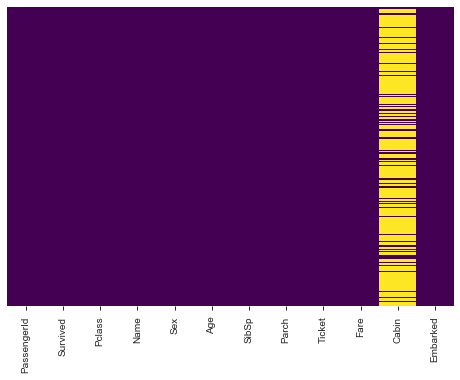

In [16]:
sns.heatmap(t_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

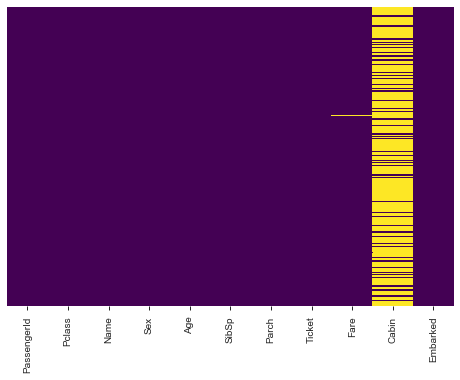

In [17]:
sns.heatmap(t_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
t_train.drop('Cabin',axis=1,inplace=True)

In [19]:
t_test.drop('Cabin',axis=1,inplace=True)

In [20]:
t_train.dropna(inplace=True)

In [21]:
t_test.dropna(inplace=True)

In [22]:
t_train.info()
print('-'*50)
t_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    417 non-null int64
Pclass         417 non-null int64
Name           417 non-null object
Sex            417 non-null object
Age            417 non-null float64
SibSp          417 non-null int64
Parch          417 non-null int64
Ticket         417 non-null object
Fare           41

In [23]:
train_sex = pd.get_dummies(t_train['Sex'] ,drop_first=True)

In [24]:
train_embark = pd.get_dummies(t_train['Embarked'],drop_first=True)

In [25]:
t_train = pd.concat([t_train,train_sex,train_embark],axis=1)

In [26]:
test_sex = pd.get_dummies(t_test['Sex'] ,drop_first=True)

In [27]:
test_embark = pd.get_dummies(t_test['Embarked'],drop_first=True)

In [28]:
t_test = pd.concat([t_test,test_sex,test_embark],axis=1)

In [29]:
t_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [30]:
t_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [31]:
t_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [32]:
t_test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [33]:
t_train.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [34]:
t_test.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [35]:
t_train.shape,t_test.shape

((889, 10), (417, 9))

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(t_train.drop('Survived',axis=1), 
                                                    t_train['Survived'],
                                                    test_size=0.30, 
                                                    random_state=101)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
y_pred = logmodel.predict(x_test)
acc_log = round(logmodel.score(x_train, y_train) * 100, 2)
acc_log

80.06

In [40]:
import xgboost as xgb

train_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
train_model.fit(x_train, y_train)
xgb = round(train_model.score(x_test,y_test)*100,2)
xgb



84.27

In [41]:
from sklearn.ensemble import AdaBoostRegressor
train_model = AdaBoostRegressor()
train_model.fit(x_train, y_train)
AdaBoost = round(train_model.score(x_test,y_test)*100,2)
AdaBoost

44.25

In [47]:
from sklearn.svm import SVC
train_model = SVC()
train_model.fit(x_train,y_train)
SVC = round(train_model.score(x_test,y_test)*100, 2)
SVC

60.67

In [48]:
from sklearn.tree import DecisionTreeClassifier
train_dtree = DecisionTreeClassifier()
train_dtree.fit(x_train,y_train)
predictions = train_dtree.predict(x_test)
DecisionTree = round(train_dtree.score(x_test,y_test)*100,2)
DecisionTree

75.28

In [49]:
from sklearn.ensemble import RandomForestClassifier
train_rfc = RandomForestClassifier(n_estimators=600)
train_rfc.fit(x_train,y_train)
RFpredictions = train_rfc.predict(x_test)
RFC= round(train_rfc.score(x_test,y_test)*100, 2)
RFC

83.52

In [50]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

80.71

In [51]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

79.42

In [52]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
Y_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron

62.86

In [53]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
Y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

60.45

In [54]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Linear SVC','Decision Tree'],
    'Score': [SVC, acc_knn, acc_log,RFC, 
              acc_gaussian, acc_perceptron,
              acc_linear_svc, DecisionTree]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,83.52
1,KNN,80.71
2,Logistic Regression,80.06
4,Naive Bayes,79.42
7,Decision Tree,75.28
5,Perceptron,62.86
0,Support Vector Machines,60.67
6,Linear SVC,60.45


In [ ]:
df_test  = pd.concat([(x_test),RFpredictions] , axis = 1)

In [ ]:
df_test.to_csv("titanic_test_result.csv",index_col = 0)